<a href="https://colab.research.google.com/github/FLjv77/TinyFaceDetection/blob/master/DetectNumberUsingTensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from matplotlib import pyplot as plt

     |████████████████████████████████| 719 kB 4.4 MB/s 
     |████████████████████████████████| 365 kB 49.5 MB/s 
     |████████████████████████████████| 1.3 MB 41.9 MB/s 
     |████████████████████████████████| 4.7 MB 38.5 MB/s 
     |████████████████████████████████| 115 kB 77.3 MB/s 
     |████████████████████████████████| 212 kB 65.8 MB/s 
     |████████████████████████████████| 120 kB 68.5 MB/s 
     |████████████████████████████████| 127 kB 56.8 MB/s 
     |████████████████████████████████| 6.6 MB 46.8 MB/s 


In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/root/.fastai/data/mnist_sample')

In [3]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [22]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

thresss_valid = (path/'valid/3').ls().sorted()
sevens_valid = (path/'valid/7').ls().sorted()

In [5]:
sample7 = sevens[89]
img7 = Image.open(sample7)
img7

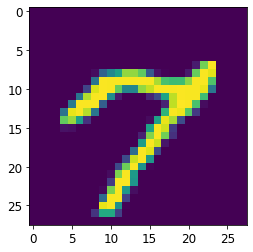

In [6]:
img7_array = array(img7)
plt.imshow(img7_array)
img7_tensor = tensor(img7)

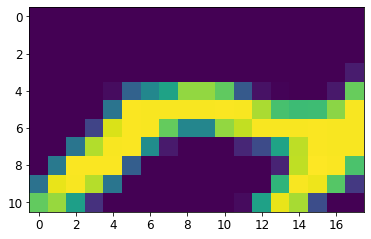

In [7]:
plt.imshow(img7_tensor[4:15, 4:22])

In [10]:
df = pd.DataFrame(img7_tensor[4:90, 1:70])
df.style.set_properties(**{'font-size': '9px'}).background_gradient('BuPu')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,201,254,0,0,0,0
4,0,0,0,0,0,0,0,8,80,118,147,214,214,193,72,12,2,0,0,17,196,253,245,0,0,0,0
5,0,0,0,0,0,0,0,98,254,253,253,253,253,254,253,223,181,175,176,211,253,253,185,0,0,0,0
6,0,0,0,0,0,0,52,241,254,253,195,117,117,214,232,253,253,253,254,253,253,247,101,0,0,0,0
7,0,0,0,0,0,99,226,253,254,125,18,0,0,0,27,58,148,230,254,253,253,176,0,0,0,0,0
8,0,0,0,0,103,254,254,254,76,0,0,0,0,0,0,0,25,231,255,254,183,8,0,0,0,0,0
9,0,0,0,96,247,253,227,99,0,0,0,0,0,0,0,0,167,253,249,188,42,0,0,0,0,0,0


In [11]:
three_tensors = [tensor(Image.open(f)) for f in threes]
seven_tensors = [tensor(Image.open(f)) for f in sevens]

In [17]:
len(seven_tensors)

6265

In [14]:
stacked_3 = torch.stack(three_tensors).float() / 255
stacked_7 = torch.stack(seven_tensors).float() / 255

In [16]:
stacked_3.shape

torch.Size([6131, 28, 28])

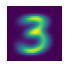

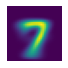

In [19]:
mean_3 = stacked_3.mean(0)
mean_7 = stacked_7.mean(0)

show_image(mean_3)
show_image(mean_7)

In [20]:
def img_distance(a, b): 
  return (a - b).abs().mean()

In [23]:
valid_3_tensors = torch.stack(
    ([tensor(Image.open(f)) for f in thresss_valid])
).float() / 255
valid_7_tensors = torch.stack(
    ([tensor(Image.open(f)) for f in sevens_valid])
).float() / 255

In [24]:
valid_3_tensors.shape

torch.Size([1010, 28, 28])

In [27]:
def img_distance(input, mean_tensor):
  return (input - mean_tensor).abs().mean((-1, -2))


def is_3(x): 
  return (img_distance(x, mean_3) < img_distance(x , mean_7)).float()

In [28]:
accuracy_3 = is_3(valid_3_tensors).mean()

print(accuracy_3)

tensor(0.9168)


In [30]:
accuracy_7 = (1 - is_3(valid_7_tensors)).mean()

print(accuracy_7)

tensor(0.9854)
